<a href="https://colab.research.google.com/github/davidest1995/Data-Science/blob/main/Estad%C3%ADstica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("/work/archive/cars.csv")

# df.dtypes
# df.describe()
# lista_precio = df['price_usd']
# promedio = df['price_usd'].mean()
# mediana = df['price_usd'].median() 
# df['price_usd'].plot.hist(bins=20)
# sns.displot(df, x= 'price_usd', hue = 'manufacturer_name')
# sns.displot(df, x = 'price_usd', hue='engine_fuel', multiple='stack')

toyota_df = df[(df['manufacturer_name']=='Toyota') & (df['model_name']== 'RAV4')]

sns.histplot(toyota_df, x='price_usd', hue ='year_produced')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("/work/archive/cars.csv")

# Cálculo de desviación estándar
df['price_usd'].std()

# Cálculo del rango 
rango= df['price_usd'].max()-df['price_usd'].min()

# Cálculo de la media, es equivalente a Q2
median= df['price_usd'].median()

min_val=df['price_usd'].quantile(q=0)
Q1=df['price_usd'].quantile(q=0.25)
Q2=df['price_usd'].quantile(q=0.5)
Q3=df['price_usd'].quantile(q=0.75)
max_val=df['price_usd'].quantile(q=1)

print(min_val,Q1,Q2,Q3,max_val,median)

# RANGO INTERCUARTIL

RIQ = Q3 - Q1
print(RIQ)


# LÍMITES PARA DETECCIÓN DE OUTLIERS(DATOS SIMETRICAMENTE DISTRIBUIDOS)

min_limit = Q1 - 1.5*RIQ
max_limit = Q2 + 1.5*RIQ

print(min_limit)
print(max_limit)

sns.histplot(df['price_usd'])

In [ ]:
sns.boxplot(df['price_usd'])

In [ ]:
sns.boxplot(x='transmission', y='price_usd',data= df)
print(df)

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

# scatterplot
# sns.scatterplot(data= iris, x='sepal_length' ,y='petal_length', hue='species' )

In [ ]:
sns.jointplot(data= iris, x='sepal_width' ,y='petal_width', hue='species')

In [ ]:
# boxplot

sns.boxplot(data= iris, x= 'species', y='petal_length')

In [ ]:
# Ejercicio calcular la longitud promedio del pétalo de cada una de las especies

x =  iris.groupby('species').agg({'petal_length':['mean'], 'petal_width':['mean'],'sepal_length':['mean'],'sepal_length':['mean']})

print(x)

sns.barplot(data= iris, x='species', y = 'sepal_length')

In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X,y = datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]


# Normalización max-min
max_raw= max(raw)
min_raw= min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)


# Normalización z
avg= np.average(raw)
std= np.std(raw)

z_scaled = (raw- avg)/ std


fig, axs = plt.subplots(3, 1 , sharex= True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)


raw_time = timeit.timeit(train_raw, number= 1000)

scaled_time = timeit.timeit(train_scaled, number= 1000)

z_scaled_time = timeit.timeit(train_z_scaled, number = 1000)

print('Train raw : {}'.format(raw_time))
print('Train scaled : {}'.format(scaled_time))
print('Train Z scaled : {}'.format(z_scaled_time))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('/work/archive/cars.csv')
data_raw = df.price_usd


# Transformada de tangente hiperbólica de la data "price_usd"

p = 10000
transformada_tanh = data_raw.apply(lambda x : np.tanh(x/p))
transformada_tanh.hist()
# fig, axs = plt.subplots(2, 1 , sharex= True)

# axs[0].hist(data_raw)
# axs[1].hist(transformada_tanh)

In [ ]:
# Transformación de una variable categórica a una variable numerica 
import pandas as pd

df= pd.read_csv('/work/archive/cars.csv')

df['engine_type'].hist()
pd.get_dummies(df['engine_type'])

In [ ]:
# TRANSFORMACIÓN DE DATOS CATEGORICOS A DATOS NUMÉRICOS QUE PUEDAN SER LEÍDOS POR UN ALGORITMO DE ML

import sklearn.preprocessing as preprocessing

encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

encoder.fit(df[['engine_type']].values)

encoder.transform([['gasoline'],['diesel'],['agua']]).toarray()

In [ ]:
# correlación entre variables

import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

# caracteristicas pelalo
longitud_petalo = iris['petal_length']
prom_petalo = iris['petal_length'].mean()
std_petalo = iris['petal_length'].std()
var_petalo = std_petalo**2

# caracteristicas sepalo
longitud_sepalo =  iris['sepal_length']
prom_sepalo = iris['sepal_length'].mean()
std_sepalo = iris['sepal_length'].std()
var_sepalo = std_sepalo**2


# hay formas más eficientes de calcular dicha correlación, ésta no dió.
corr = (var_petalo*var_sepalo)/(std_petalo*std_sepalo)
corr

# sns.jointplot(data= iris, x='sepal_length' ,y='petal_length', hue='species')

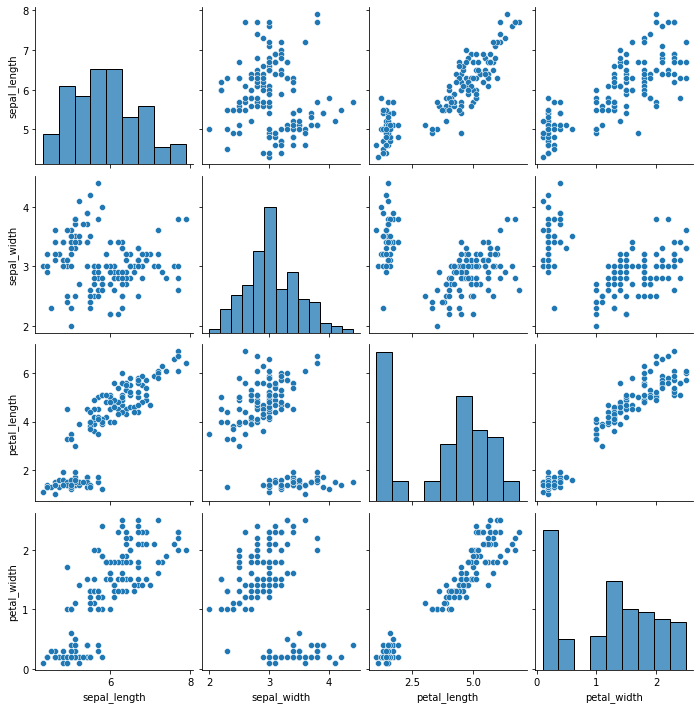

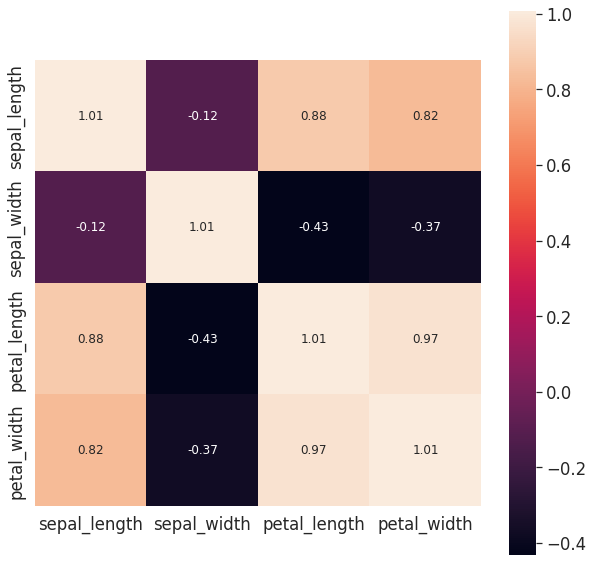

In [ ]:
# Matriz de covarianza entre multiples variables

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

# esta función detecta de forma grafica la correlación que hay entre las diferentes variables
# la diagonal solo muestra un histograma de la variable con ella misma
sns.pairplot(iris)

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

# La covarianza se calcula con la transpuesta de la matriz

covariance_matrix = np.cov(scaled.T)
covariance_matrix

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm= sns.heatmap(covariance_matrix,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size' : 12},
                yticklabels= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                xticklabels= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

matriz que agrupa la varianza(OPTIMIZADA) [0.72962445 0.22850762]:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


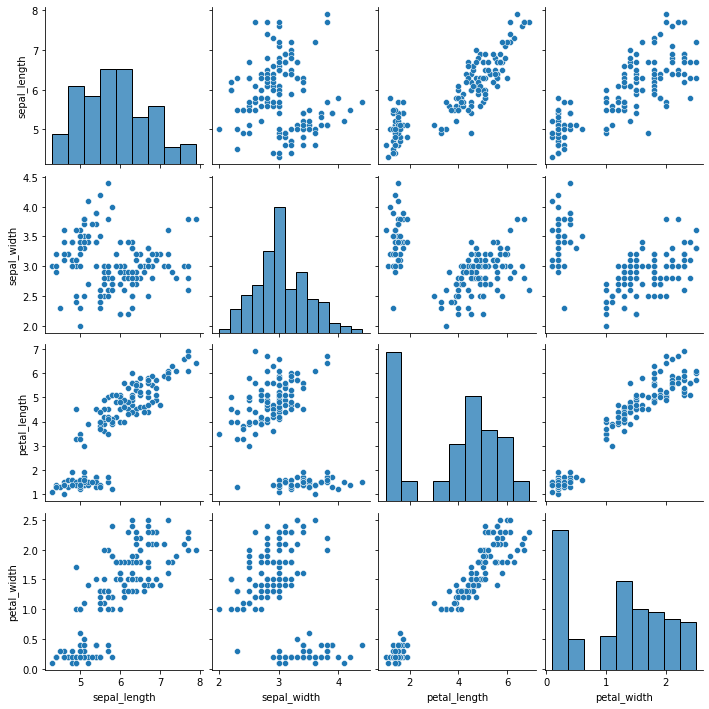

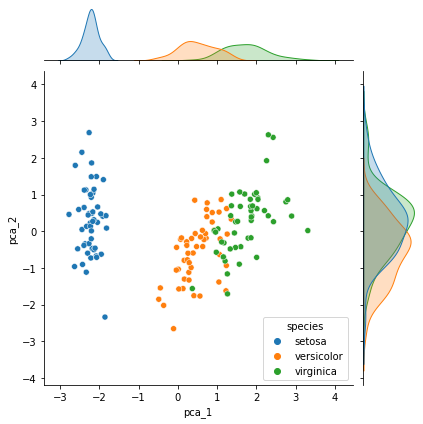

In [ ]:
# Reducción de dimensionalidad con PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# La siguiente función sirve para decomponer un dataset de n variables
# al número de variables que nosotros consideremos pertinente
from sklearn.decomposition import PCA


iris = sns.load_dataset('iris')

# IMPORTANTE
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

#la matriz escalada se puede mostrar así: 
# print('la matriz escalada es {}'.format(scaled))
# simplemente escala los datos según la función aplicada en este caso fit_transform
# IMPORTANTE

covariance_matrix = np.cov(scaled.T)
# print('La matriz de covarianza es {}'.format(covariance_matrix))

# Se puede ver la relación fuerte entre dos variables
# petal_width y petal_length
# IMPORTANTE
sns.pairplot(iris)

# Descomposición en vectores y valores propios:
# NO IMPORTANTE
# eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
# print('La matriz de valores propios es {}'.format(eigen_values))

# variance_explained = []

# for i in eigen_values:
#     variance_explained.append((i/sum(eigen_values))*100)

# print('La matriz que agrupa la varianza es {}'.format(variance_explained))

# Con el método PCA puedo optimizar el número de variables de mi
# dataset, se redujo a 2 variables porque en estas encuentro más
# del 90% DE MI DATA
# IMPORTANTE

pca = PCA(n_components=2)
pca.fit(scaled)
matriz_pca = pca.explained_variance_ratio_
print('matriz que agrupa la varianza(OPTIMIZADA) {}:'.format(matriz_pca))


# REDUCCIÓN DE VARIABLES
# IMPORTANTE
reduced_scaled = pca.transform(scaled)

iris['pca_1'] = reduced_scaled[:,0]
iris['pca_2'] =reduced_scaled[:,1]

sns.jointplot(iris['pca_1'], iris['pca_2'], hue= iris['species'])